#  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data.

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$', "").astype("float")
sp500_history_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_history_returns = sp500_history_df.pct_change()
sp500_history_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_history_returns = sp500_history_returns.dropna()
sp500_history_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
sp500_history_returns.columns = ["S&P 500"]
sp500_history_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_returns], axis = "columns", join = "inner")
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

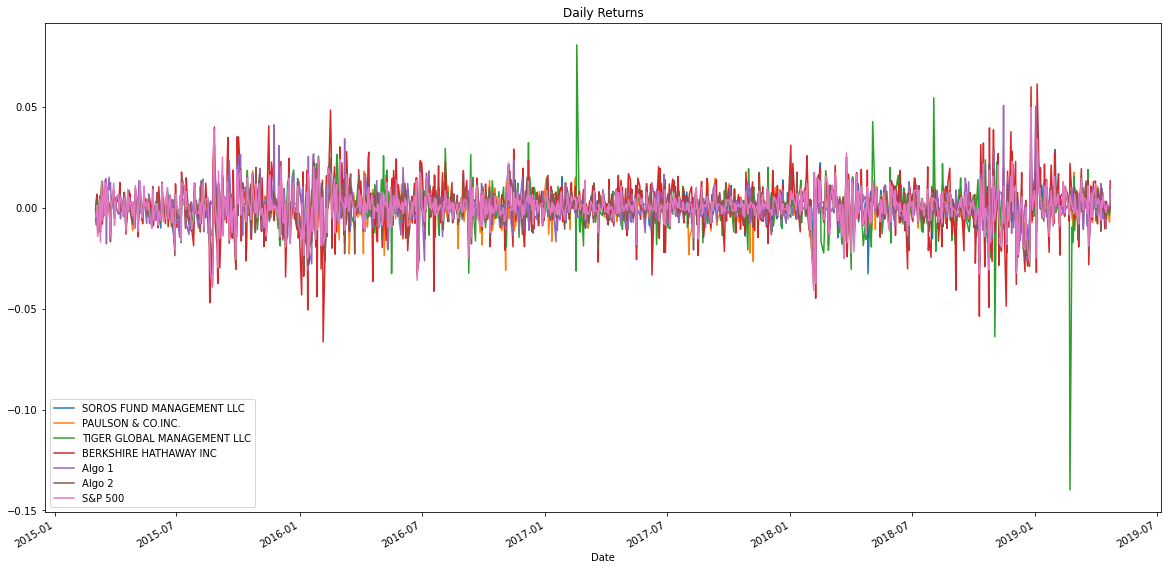

In [16]:
# Plot daily returns
combined_returns_df.plot(figsize = (20,10), title = "Daily Returns")

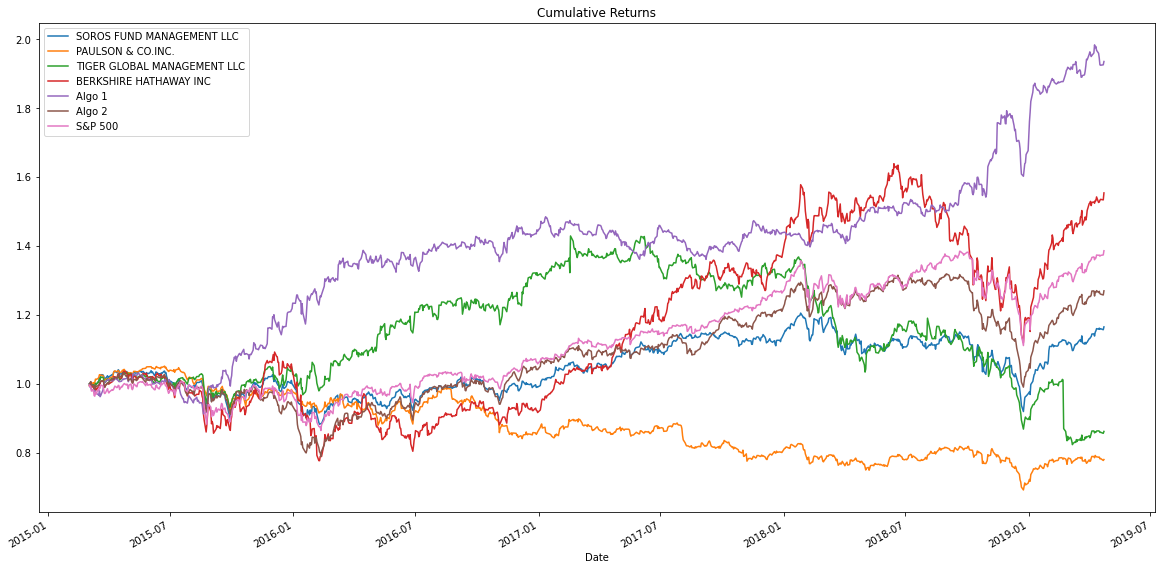

In [17]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns_df).cumprod()
cumulative_returns.plot(figsize = (20,10), title = "Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

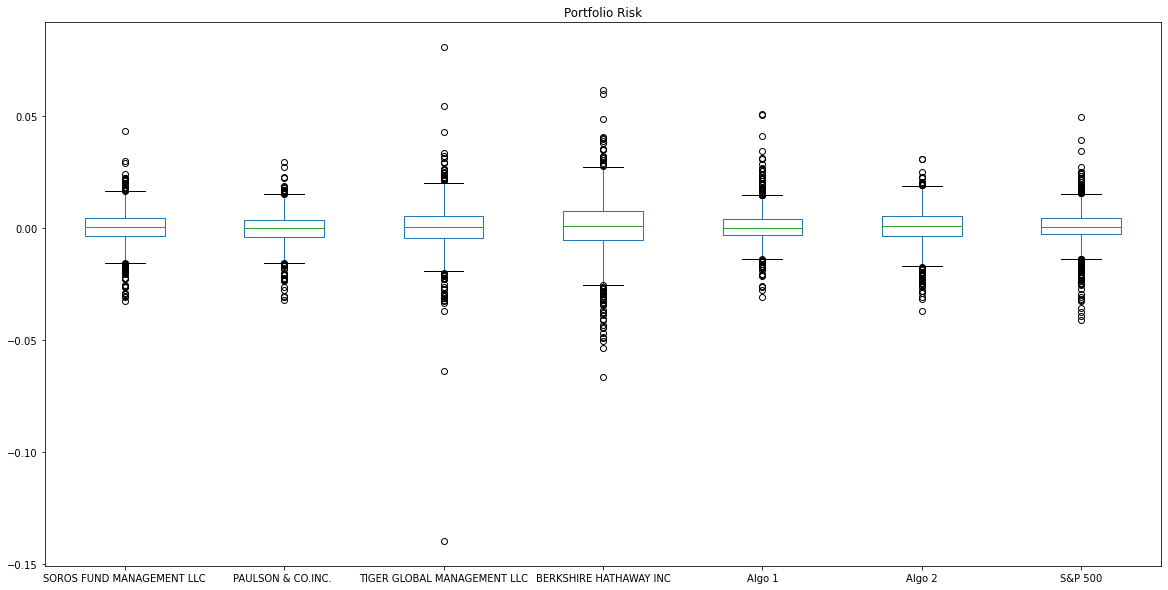

In [18]:
# Box plot to visually show risk
combined_returns_df.plot.box(figsize = (20,10), title = "Portfolio Risk")

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio
combined_std_dev = combined_returns_df.std()
combined_std_dev.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_combined_stddev = combined_std_dev * np.sqrt(252)
annual_combined_stddev

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

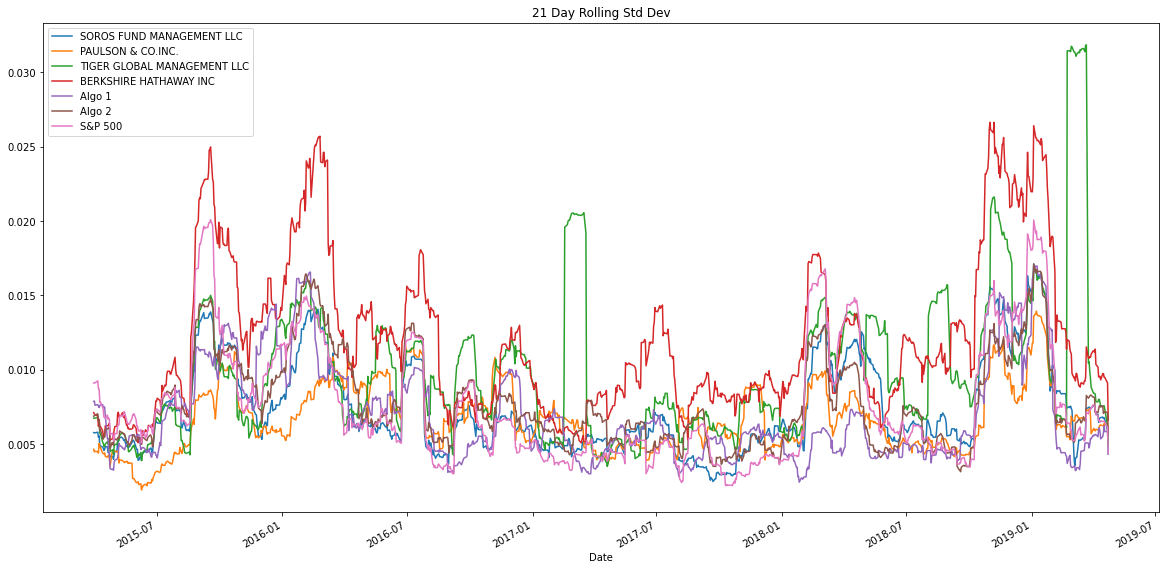

In [22]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 day trading window
combined_returns_df.rolling(window = 21).std().plot(figsize = (20,10), title = "21 Day Rolling Std Dev")

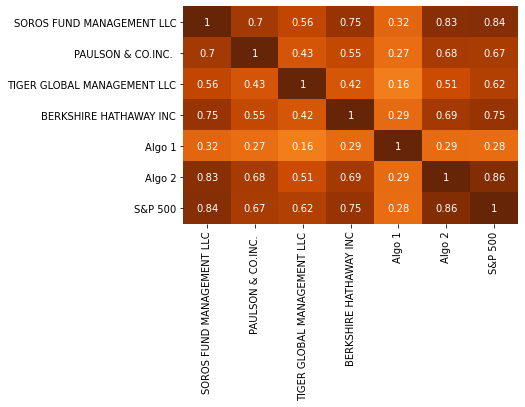

In [23]:
# Construct a correlation table
import seaborn as sns
corr_combined_returns = combined_returns_df.corr()
sns.heatmap(corr_combined_returns, vmin = -1, vmax = 1, annot = True, cmap = "YlOrBr", cbar = False)

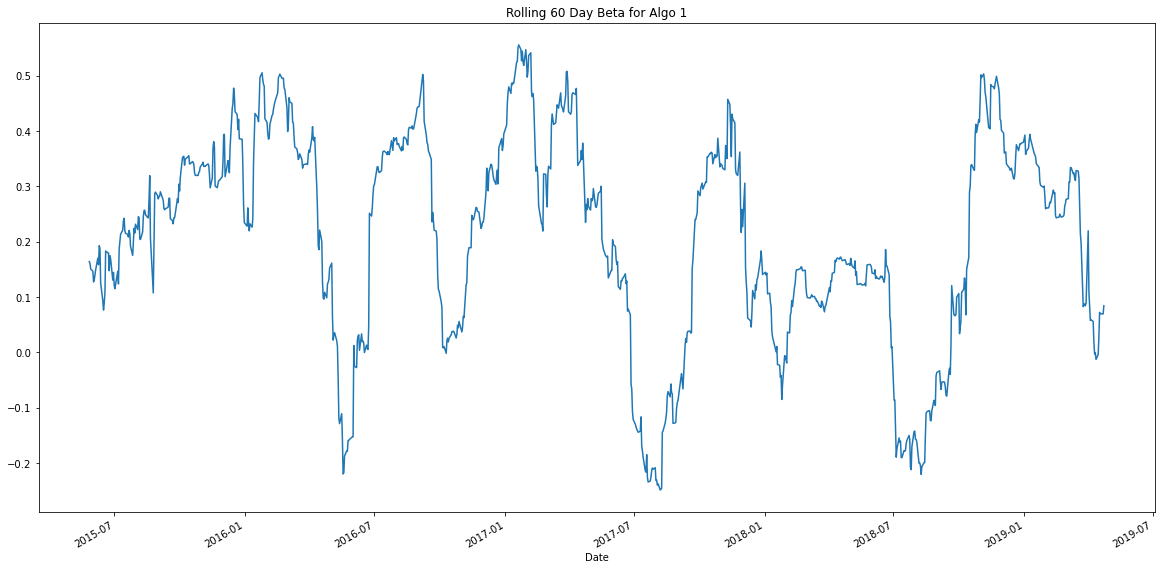

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
roll_covar = combined_returns_df["Algo 1"].rolling(window = 60).cov(combined_returns_df["S&P 500"])
roll_var = combined_returns_df["S&P 500"].rolling(window = 60).var()
roll_beta = roll_covar/roll_var
roll_beta.plot(figsize = (20,10), title = "Rolling 60 Day Beta for Algo 1")

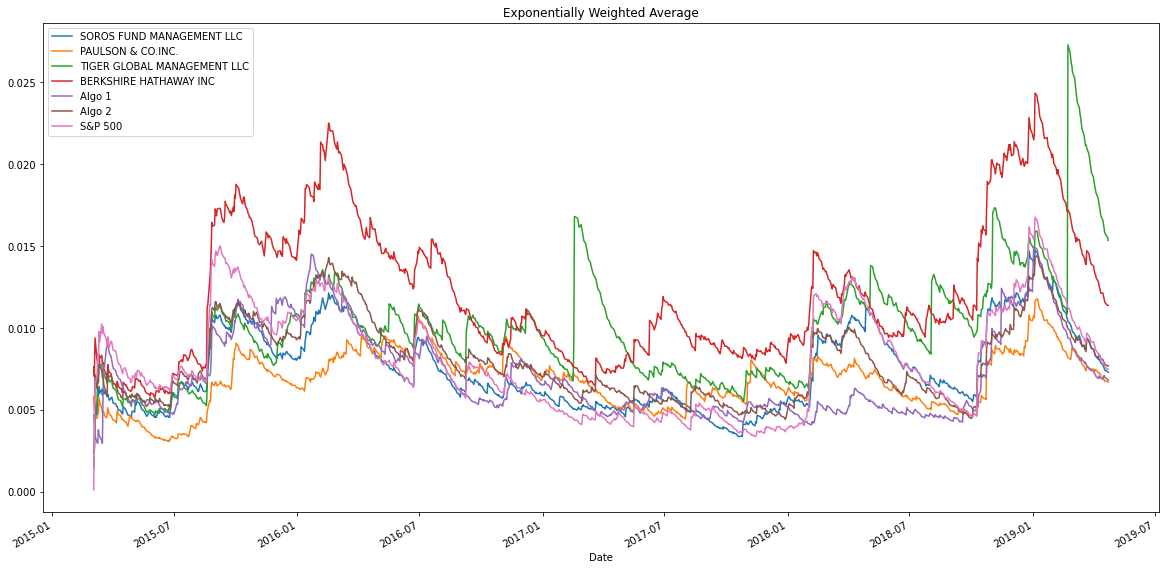

In [25]:
# Calculate a rolling window using the exponentially weighted moving average.
combined_returns_df.ewm(halflife = 21).std().plot(figsize = (20,10), title = "Exponentially Weighted Average")

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

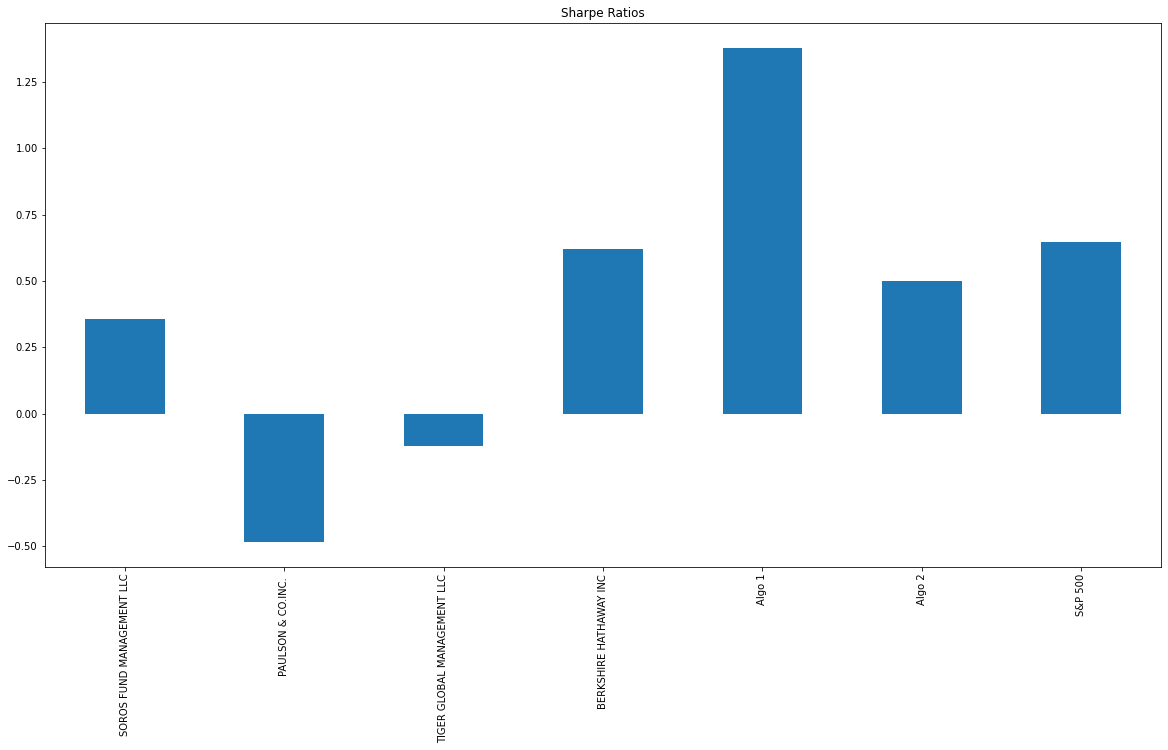

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize = (20,10), title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

Yes, Algo 1 outperforms both

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Read the first stock
adidas_historical_csv = Path("Resources/adidas_historical.csv")
adidas_historical_df = pd.read_csv(adidas_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
adidas_historical_df = adidas_historical_df.sort_index()
adidas_historical_df.index = adidas_historical_df.index.date
adidas_historical_df.head()

,Close
2018-05-11,113.13
2018-05-14,112.97
2018-05-15,111.79
2018-05-16,114.69
2018-05-17,115.12


In [40]:
# Read the second stock
shopify_historical_csv = Path("Resources/shopify_historical.csv")
shopify_historical_df = pd.read_csv(shopify_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
shopify_historical_df = shopify_historical_df.sort_index()
shopify_historical_df.index = shopify_historical_df.index.date
shopify_historical_df.head()

,Close
2018-05-11,144.47
2018-05-14,142.64
2018-05-15,142.50
2018-05-16,142.28
2018-05-17,146.10


In [41]:
# Read the third stock
spirit_historical_csv = Path("Resources/spirit_historical.csv")
spirit_historical_df = pd.read_csv(spirit_historical_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
spirit_historical_df = spirit_historical_df.sort_index()
spirit_historical_df.index = spirit_historical_df.index.date
spirit_historical_df.head()

,Close
2018-05-11,36.63
2018-05-14,35.96
2018-05-15,36.09
2018-05-16,36.94
2018-05-17,37.13


In [42]:
# Concatenate all stocks into a single DataFrame
custom_combined_df = pd.concat([adidas_historical_df, shopify_historical_df, spirit_historical_df], axis = "columns", join = "inner")
custom_combined_df.head()

,Close,Close,Close
2018-05-11,113.13,144.47,36.63
2018-05-14,112.97,142.64,35.96
2018-05-15,111.79,142.50,36.09
2018-05-16,114.69,142.28,36.94
2018-05-17,115.12,146.10,37.13


In [43]:
# Reset the index

In [44]:
# Pivot so that each column of prices represent a unique symbol
custom_combined_df.columns = ["ADDYY", "SHOP", "SAVE"]
custom_combined_df.head()

,ADDYY,SHOP,SAVE
2018-05-11,113.13,144.47,36.63
2018-05-14,112.97,142.64,35.96
2018-05-15,111.79,142.50,36.09
2018-05-16,114.69,142.28,36.94
2018-05-17,115.12,146.10,37.13


In [45]:
# Calculate returns and drop nulls
custom_combined_returns = custom_combined_df.pct_change()
custom_combined_returns = custom_combined_returns.dropna()
custom_combined_returns.head()

,ADDYY,SHOP,SAVE
2018-05-14,-0.001414,-0.012667,-0.018291
2018-05-15,-0.010445,-0.000981,0.003615
2018-05-16,0.025941,-0.001544,0.023552
2018-05-17,0.003749,0.026848,0.005143
2018-05-18,-0.002519,0.006571,0.000539


In [46]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_custom_returns = custom_combined_returns.dot(weights)
weighted_custom_returns.head()

2018-05-14   -0.010791
2018-05-15   -0.002604
2018-05-16    0.015983
2018-05-17    0.011914
2018-05-18    0.001530
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
total_combined = pd.concat((combined_returns_df, weighted_custom_returns), axis = "columns", join = "inner")
total_combined.rename(columns = {0: "Custom"}, inplace = True)
total_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.010791
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.002604
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.015983
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.011914
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.001530
